# Python Assignment - Working With Events

In this question, you are given 4 text files. 
These files contain timestamps, which correspond to the times of some 'events'. 

Your first task is to find out how many events are present in each file.

Consider only those events which have a positive value for timestamp


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Reading Data from each of the files

with open("event_Q1.txt", "r") as f:
    data = f.read()
    
columns = data.split(", ") #Splitting the read data

eventQ1data = np.array(columns).astype(float)#Storing the splitted data as a float into a numpy array


with open("event_Q2.txt", "r") as f:
    data = f.read()
    
columns = data.split(", ")

eventQ2data = np.array(columns).astype(float)

with open("event_Q3.txt", "r") as f:
    data = f.read()
    
columns = data.split(", ")

eventQ3data = np.array(columns).astype(float)

with open("event_Q4.txt", "r") as f:
    data = f.read()
    
columns = data.split(", ")

eventQ4data = np.array(columns).astype(float)

# Filtering out events from each of the files

events_file1 = eventQ1data[np.where(eventQ1data > 0)[0]]
events_file2 = eventQ2data[np.where(eventQ2data > 0)[0]]
events_file3 = eventQ3data[np.where(eventQ3data > 0)[0]]
events_file4 = eventQ4data[np.where(eventQ4data > 0)[0]]

print(f'The number of events in file1 is {events_file1.size}')
print(f'The number of events in file2 is {events_file2.size}')
print(f'The number of events in file3 is {events_file3.size}')
print(f'The number of events in file4 is {events_file4.size}')





The number of events in file1 is 6528
The number of events in file2 is 7800
The number of events in file3 is 7858
The number of events in file4 is 5193


After this, for each file, make a plot of events per second in that file.
You dont have to find the average rate, instead for each second 0-1, 1-2, 2-3, .. 54-55, find the number of events in each second and plot it with respect to time.

Plot these 4 separately, as well as in a single overlapping plot.
Make sure to give proper titles, labels and legends.

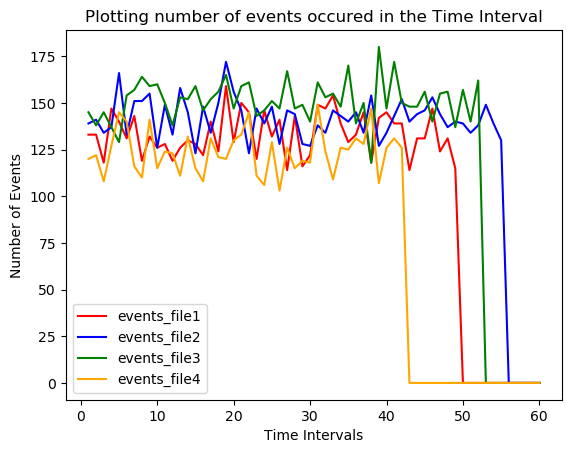

In [5]:
freq1 = np.zeros(60)
freq2 = np.zeros(60)
freq3 = np.zeros(60)
freq4 = np.zeros(60)

for i in events_file1.astype(int) :
    freq1[i] += 1
# print(freq1)

for i in events_file2.astype(int) :
    freq2[i] += 1
# print(freq2)

for i in events_file3.astype(int) :
    freq3[i] += 1
# print(freq3)

for i in events_file4.astype(int) :
    freq4[i] += 1
# print(freq4)

x = np.linspace(1,60,60) # Creating an array for values to be plotted on X-axis
# print(x)

#Plotting

plt.plot(x,freq1,color = 'red', label = "events_file1")
plt.plot(x,freq2,color = 'blue', label = "events_file2")
plt.plot(x,freq3,color = 'green', label = "events_file3")
plt.plot(x,freq4,color = 'orange', label = "events_file4")

"""We have plotted the graph using the following convention. At time interval = 1, the frequency of events in the interval
0 - 1 seconds is plotted, at time interval = 2, frequency of events occured in between 1 - 2 seconds has been plotted 
and so on """

# Details of the Plot
plt.title("Plotting number of events occured in the Time Interval")
plt.xlabel("Time Intervals")
plt.ylabel("Number of Events")
plt.legend()

Give your insights on what you observe in the various plots. Regarding frequency of events in various files as well as the total duration each file is covering.

The general trend followed by frequency of events :

File 3 $>$ File 2 $>$ File 1 $>$ File 4

The total duration of each file follows the order :

File 2 $>$ File 3 $>$ File 1 $>$ File 4

General Analysis:

File 4 lasted for the shortest duration also having the least frequency of events. Therefore, we can verify and conclude that the least number of events occured in file 4.

File 2 had the longest duration but with a lower frequency of events than file 3, which is consistent with the fact that they have approximately the same number of events, with file 3 having slightly more.

File 1 lasted longer with higher frequency of events than file 4, but lower than duration and frequency of files 2 and 3.



Now for the final part of this question. We can see that the event frequency varies with time. Count how many bins are there, where atleast 2 of the files have more than 140 events in that bin, simultaneously.

In [10]:
#Finding Indices where the frequency is greater than 140 for each of the files

bin_file1 = np.where(freq1 > 140)
bin_file2 = np.where(freq2 > 140)
bin_file3 = np.where(freq3 > 140)
bin_file4 = np.where(freq4 > 140)

bin_resultant = []


for i in range(55):
    counter = 0  #Counter variable
    
    if i in bin_file1[0]:
        
        counter += 1
    
    if i in bin_file2[0]:
        
        counter += 1
        
    if i in bin_file3[0]:
        
        counter += 1
    
    if i in bin_file4[0]:
        
        counter += 1
    
    if (counter >= 2) :
        
        bin_resultant.append(i)

        
print(bin_resultant)

print(f'Number of bins with number of events greater than 140 in at least 2 of the files is {len(bin_resultant)}')
        



15
[4, 6, 7, 8, 10, 12, 13, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46]
Number of bins with number of events greater than 140 in at least 2 of the files is 33


## Bonus

Let us do this more generally Generate a table with the threshold along one axis and the number of files along the other axis. Fill the table with counts of bins where atleast num_files have more than threshold events in that bin. In the previous part, num_files was 2 and num_bins was 140. Do this for num_files in [1,2,3,4]. num_bins in [130,135,140,145,150,155,160]. Print the table.

In [ ]:
threshold_counter = 130
bins_counter = 0
row_array = []
bonus_result = []

for row in range(7):
    
    bin_file1 = np.where(freq1 > threshold_counter)
    bin_file2 = np.where(freq2 > threshold_counter)
    bin_file3 = np.where(freq3 > threshold_counter)
    bin_file4 = np.where(freq4 > threshold_counter)
    
    row_array = []
    
    for col in range(4):
        
        bin_counter = 0
        
        for i in range(55):
            
            counter = 0
            
            if i in bin_file1[0]:

                counter += 1

            if i in bin_file2[0]:

                counter += 1

            if i in bin_file3[0]:

                counter += 1

            if i in bin_file4[0]:

                counter += 1

            if (counter >= (col+1)) :

                bin_counter += 1
                
        row_array.append(bin_counter)
        
    bonus_result.append(row_array)
    threshold_counter += 5

# print(bonus_result)
# Creating a DataFrame to display the table using Pandas
data = {
    "130" : bonus_result[0],
    "135" : bonus_result[1],
    "140" : bonus_result[2],
    "145" : bonus_result[3],
    "150" : bonus_result[4],
    "155" : bonus_result[5],
    "160" : bonus_result[6]
}

""" !!!! The Row Headers i.e. [0,1,2,3] are [1,2,3,4] num_files respectively !!!!"""

df = pd.DataFrame(data)

#Print the Table
df.style




